In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from __future__ import print_function
from __future__ import division

# DAMLAS - Machine Learning At Scale
## Assignment - HW4
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  *Renee Murray*   
__Class:__ DAMLAS (Section Summer 2016 Target)     
__Email:__  renee.murray@Target.com     
__Week:__   04

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW 4 Problems](#3)   
    4.0.  [Final Project description](#4.0)   
    4.1.  [Build a decision to predict whether you can play tennis or no](#4.1)   
    4.2.  [Regression Tree (OPTIONAL Homework)](#4.2)    
    4.3.  [Predict survival on the Titanic](#4.3)    
    4.4.  [Heritage Healthcare Prize (Predict # Days in Hospital next year)](#4.4)  


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Thursday, 08/18/2016 at 11AM (CT).


* Prepare a single Jupyter notebook (not a requirment), please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* [Lecture Slides on Decision Trees and Ensembles](https://www.dropbox.com/s/lm4vuocqoq6mq7k/Lecture-13-Decision-Trees-PLanet.pdf?dl=0)

* Chapter 17 on decision Trees,   https://www.dropbox.com/s/5ca98ah5chqlcmn/Data_Science_from_Scratch%20%281%29.pdf?dl=0   [Please do not share this PDF]
* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---

---

## 3.  HW4  <a name="4"></a>
[Back to Table of Contents](#TOC)

 <a name="4.0"></a>
## HW4.0 Final Project description

Please prepare your project description using the following format
* 200 words abstract
* data source and description
* pipeline of steps (in a block diagram)
* Metrics for success

PLEASE NOTE: We will probably have project team sizes of 3 people plus/minus 1

## Renee's Projct Proposal:

Note that I am planning on working on this project independently as I will be in Europe for a significant portion of the project. I look forward to any feedback you have. This plan will become clearer as I'm able to dive into the project. 

### Abstract: 
I will examine the accuracy of my existing store hours optimization model and build a new model with the hope of improving accuracy. The existing model predicts how much gross margin a store would make on average if they extended their hours (either open or close by 1 hour). This model simply uses the three hours of sales/margin leading up to close or after open to make that prediction. 

My first thought is to create a classification algorithm that predicts whether or not a store was profitable (gross margin > $150 (to account for payroll in extended hour) when they extended their hours. The variables that accurately predict if they were profitable will likely be beneficial in predicting profitability for extending store hours going forward. 

I then want to build a new predictive model for optimizing store hours that will hope full improve accuracy/predictive power over the current model. The type of model will be determined based on EDA and the results of the initial classification model. 

### Pipeline:
Source data -> Build classification model -> Determine best model for predicting profitiablity based on top predictors in classification model -> Build store hours optimization model (ideally using transactional data) using test and training set - > Compare accuracy from old and new model

### Metrics for sucess:
- Current model moved from SAS to Python
- Model is automated to a point that analysis can be completed in less than a week in future years
- Classification model complete: Predicts which stores that have extended are profitable during those extended hours (avg. gross margin above $150). 
    - Variables that are able to accurately differentiate stores are good candidates for updated model for predicting sales/gross margin
- Build model for predicting sales/gross margin in extended hours. In addition to including sales in current hours, incorporate predictors found in classification model. 
- Stretch goal: If possible in the time allowed for this project, I'd like to pull transactional level data from Big Red (Target's Hadoop) and use that data for building the model as with that additional sales detail would likely be beneficial. Otherwise I will use data available on Teradata, but still build the model using the techniques we learned in class.

 <a name="4.1"></a>
## HW4.1 Build a decision to predict whether you can play tennis or not

[Back to Table of Contents](#TOC)

Decision Trees

Write a program in Python (or in Spark; this part is optional) to implement the ID3 decision tree algorithm. You should build a tree to predict PlayTennis, based on the other attributes (but, do not use the Day attribute in your tree.). You should read in a space delimited dataset in a file called dataset.txt and output to the screen your decision tree and the training set accuracy in some readable format. For example, here is the tennis dataset. The first line will contain the names of the fields:

<PRE>
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no
</PRE>

The last column is the classification attribute, and will always contain contain the values yes or no.

For output, you can choose how to draw the tree so long as it is clear what the tree is. You might find it easier if you turn the decision tree on its side, and use indentation to show levels of the tree as it grows from the left. For example:

<PRE>
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes

</PRE>

You don't need to make your tree output look exactly like above: feel free to print out something similarly readable if you think it is easier to code.

You may find Python dictionaries especially useful here, as they will give you a quick an easy way to help manage counting the number of times you see a particular attribute.

Here are some FAQs that I've gotten in the past regarding this assignment, and some I might get if I don't answer them now.

__Should my code work for other datasets besides the tennis dataset?__ 
Yes. We will give your program a different dataset to try it out with. You may assume that our dataset is correct and well-formatted, but you should not make assumptions regrading number of rows, number of columns, or values that will appear within. The last column will also be the classification, and will always contain yes or no values.

__Is it possible that some value, like "normal," could appear in more than one column?__
Yes. In addition to the column "humidity", we might have had another column called "skycolor" which could have values "normal," "weird," and "bizarre."

__Could "yes" and "no" appear as possible values in columns other than the classification column?__
Yes. In addition to the classification column "playtennis," we might have had another column called "seasonalweather" which would contain "yes" and "no."

In [4]:
file = open("tennis.txt", "w")

file.write("""Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no
""")

file.close()

In [5]:
def prep_data(filename, delim):
    d = list()
    
    with open(filename) as f:
        # skips the id column [], in this case Day
        header = f.readline().strip().split(delim)[1:-1] 
        other_lines = f.readlines()
    
    for i in other_lines:
        columns = i.strip().split(delim)[1:]
        columns[-1] = bool(columns[-1] == 'yes')

        d.append((
            dict(zip(header, columns)), 
            columns[-1]
        ))
            
    return d

In [6]:
import itertools

data = prep_data('tennis.txt', delim = ' ')

print(data)

[({'outlook': 'sunny', 'temperature': 'hot', 'wind': 'FALSE', 'humidity': 'high'}, False), ({'outlook': 'sunny', 'temperature': 'hot', 'wind': 'TRUE', 'humidity': 'high'}, False), ({'outlook': 'overcast', 'temperature': 'hot', 'wind': 'FALSE', 'humidity': 'high'}, True), ({'outlook': 'rainy', 'temperature': 'mild', 'wind': 'FALSE', 'humidity': 'high'}, True), ({'outlook': 'rainy', 'temperature': 'cool', 'wind': 'FALSE', 'humidity': 'normal'}, True), ({'outlook': 'rainy', 'temperature': 'cool', 'wind': 'TRUE', 'humidity': 'normal'}, False), ({'outlook': 'overcast', 'temperature': 'cool', 'wind': 'TRUE', 'humidity': 'normal'}, True), ({'outlook': 'sunny', 'temperature': 'mild', 'wind': 'FALSE', 'humidity': 'high'}, False), ({'outlook': 'sunny', 'temperature': 'cool', 'wind': 'FALSE', 'humidity': 'normal'}, True), ({'outlook': 'rainy', 'temperature': 'mild', 'wind': 'FALSE', 'humidity': 'normal'}, True), ({'outlook': 'sunny', 'temperature': 'mild', 'wind': 'TRUE', 'humidity': 'normal'}, T

In [7]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random

def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]

def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)
    
    return sum( data_entropy(subset) * len(subset) / total_count
                for subset in subsets )

def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups
    
def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute])    

def partition_entropy_by(inputs,attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())        

def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

def build_tree_id3(inputs, split_candidates=None):
    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
        key = partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.iteritems() }

    subtrees[None] = num_trues > num_falses # default case
    
    return (best_attribute, subtrees)

In [9]:
# run if running this notebook for the first time in docker instance
# Note that this does not work while on Target's network (firewall nightmares)
!conda install -y graphviz
!conda install -y -c pdrops pygraphviz=1.2

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda/envs/python2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    expat-2.1.0                |                0         365 KB
    libtool-2.4.2              |                0         547 KB
    graphviz-2.38.0            |                2        12.0 MB
    ------------------------------------------------------------
                                           Total:        12.9 MB

The following NEW packages will be INSTALLED:

    expat:      2.1.0-0              
    graphviz:   2.38.0-2             
    jbig:       2.1-0                
    libtool:    2.4.2-0              

The following packages will be UPDATED:

    fontconfig: 2.11.1-3  conda-forge --> 2.11.1-6   

The following packages will be SUPERCEDED by a higher-priority channel:

    cairo:

In [10]:
import networkx as nx

print("Building the tree: ")
tree1 = build_tree_id3(data)

def add_node(graph, name, parent):
    name = '{} {}'.format(graph.number_of_nodes() + 1, name)
    graph.add_node(name)
    if parent: 
        graph.add_edge(parent, name)
    return name

def build_graph(data, level=0, parent=None, graph=None, max_depth=10):
    if level > max_depth:
        return graph
    if graph is None:
        graph = nx.DiGraph()
    prefix = '   ' 
    print(prefix * level, '|', data[0])
    node_name = add_node(graph, data[0], parent)
    for name, branch in data[1].items():
        child_name = add_node(graph, name, node_name)
        if isinstance(branch, tuple):
            print(prefix * (level + 1), '|', name)
            build_graph(branch, level + 2, child_name, graph)
        else:  
            print(prefix * (level + 1), '|', name, branch)
    return graph
    
tree1_graph = build_graph(tree1)

Building the tree: 
 | outlook
    | None True
    | rainy
       | wind
          | None True
          | FALSE True
          | TRUE False
    | overcast True
    | sunny
       | humidity
          | high False
          | None False
          | normal True


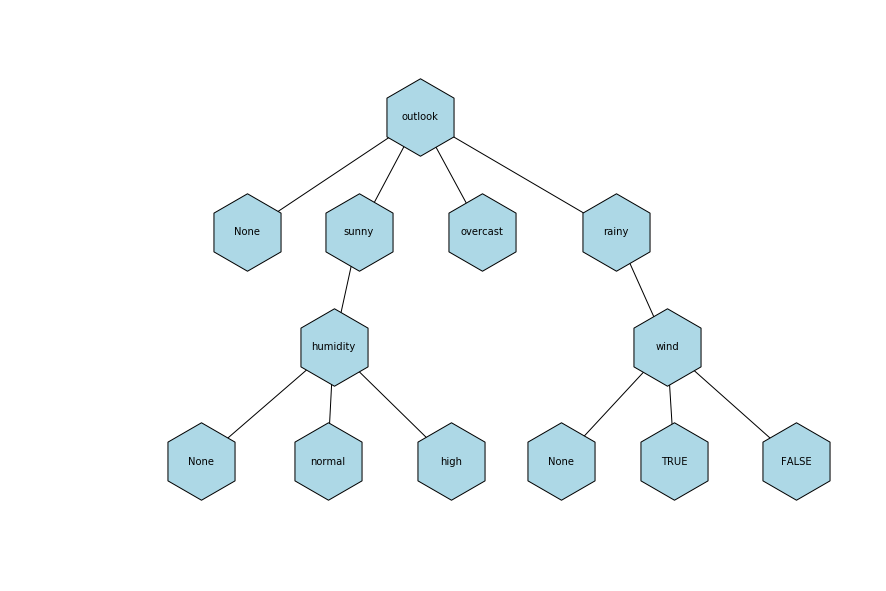

In [11]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import write_dot


def draw_graph(graph):
    position = graphviz_layout(graph, prog='dot')
    
    labels = {}
    
    for node in graph:
        labels[node] = node.split()[-1]
    
    plt.figure(figsize=(15, 10), dpi=80)
    plt.axis('off')
    nx.draw_networkx_nodes(graph, position, node_size=6000, node_color='lightblue', node_shape='h')
    nx.draw_networkx_edges(graph, position, arrows=False)
    nx.draw_networkx_labels(graph, position, font_size=10, labels=labels)
    plt.show()
    
draw_graph(tree1_graph)

In [12]:
def accuracy(data, tree):
    accuracy = 0

    for entry in data: 
        if classify(tree, entry[0]) == entry[1]:
            accuracy += 1
        print('Actual: {}, Prediction: {}'.format(entry[1], classify(tree, entry[0])))

    return 'Decision tree accuracy is: {:0.2f}%'.format(accuracy / len(data) * 100)

In [13]:
result = accuracy(data, tree1)
print(result)

Actual: False, Prediction: False
Actual: False, Prediction: False
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: False, Prediction: False
Actual: True, Prediction: True
Actual: False, Prediction: False
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: False, Prediction: False
Decision tree accuracy is: 100.00%


__ HW4.1.1 What is the classification accuracy of the tree on the training data?__


100% (see accuracy results above)

__HW4.1.2  Is it possible to produce some set of correct training examples that will get the algorihtm
to include the attribute Temperature in the learned tree, even though the true target concept is
independent of Temperature? if no, explain. If yes, give such a set. __

### Yes - If we include all but the last 4 rows of the data, it will include temperature in the learned tree

Building the tree: 
 | outlook
    | None True
    | rainy
       | wind
          | None True
          | FALSE True
          | TRUE False
    | overcast True
    | sunny
       | temperature
          | None False
          | hot False
          | mild False
          | cool True


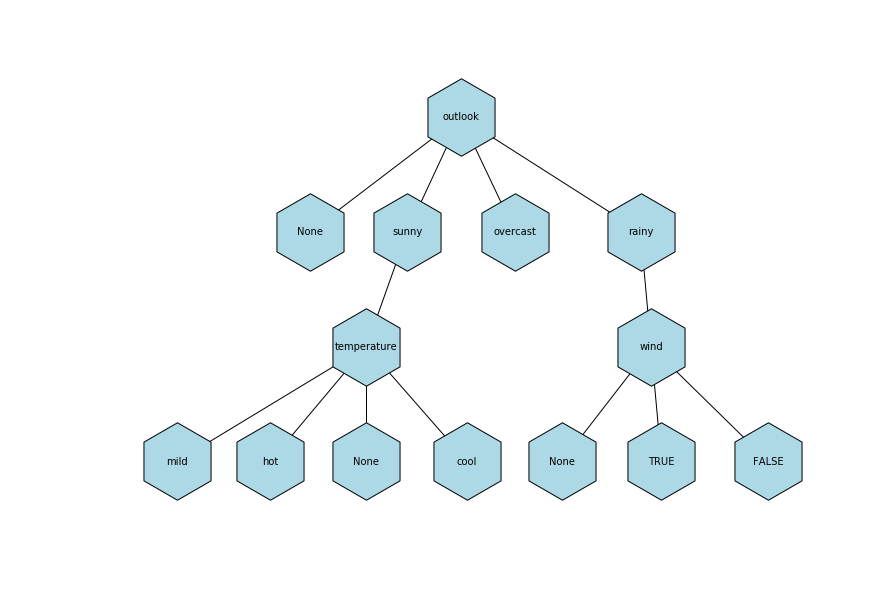

In [14]:
sample_data = data[:-4]

print("Building the tree: ")
tree2 = build_tree_id3(sample_data)
tree2_graph = build_graph(tree2)
draw_graph(tree2_graph)

__HW4.1.3  Now, build a tree using only examples D1–D7. What is the classification accuracy for the
training set? what is the accuracy for the test set (examples D8–D14)? explain why you think these
are the results.__

Building the tree: 
 | outlook
    | None True
    | rainy
       | wind
          | None True
          | FALSE True
          | TRUE False
    | overcast True
    | sunny False


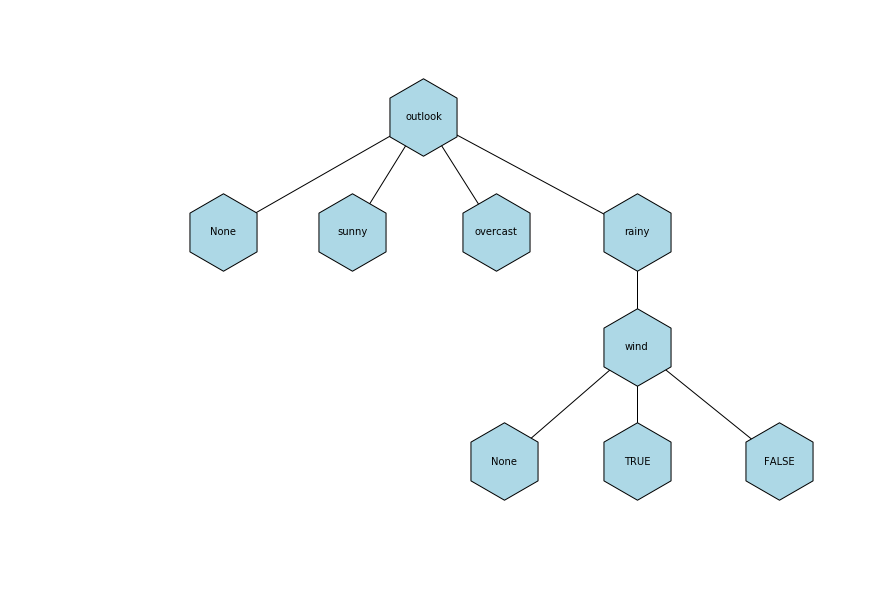

Actual: False, Prediction: False
Actual: True, Prediction: False
Actual: True, Prediction: True
Actual: True, Prediction: False
Actual: True, Prediction: True
Actual: True, Prediction: True
Actual: False, Prediction: False
Decision tree accuracy is: 71.43%


In [15]:
train_data = data[:7]
test_data = data[7:]

print("Building the tree: ")
tree3 = build_tree_id3(train_data)
tree3_graph = build_graph(tree3)
draw_graph(tree3_graph)

result2 = accuracy(test_data, tree3)
print(result2)

__HW4.1.4 In this case, and others, there are only a few labelled examples available for training (that
is, no additional data is available for testing or validation). Suggest a concrete pruning strategy, that
can be readily embedded in the algorithm, to avoid over fitting. Explain why you think this strategy
should work.__

### The easiest thing would be to set a minimum number of cases that would fall into each leaf. This will prevent leafs that are too specific and won't occur often in the population. Or after the fact you can use pruning to remove leaves that have below a certain percent of cases in them. 

### Another option is to limit the size of the tree. Based on the amount of data you can set a max number of levels you will alow in the tree. By not splitting the data into extremely small buckets this prevents overfitting. 

 <a name="4.2"></a>
 ## HW4.2 Regression Tree (OPTIONAL Homework) 
 
[Back to Table of Contents](#TOC)

Implement a decision tree algorithm for regression for two input continous variables and one categorical input variable on a single core computer using Python. 

- Use the IRIS dataset to evaluate your code, where the input variables are: Petal.Length Petal.Width  Species  and the target or output variable is  Sepal.Length. 
- Use the same dataset to train and test your implementation. 
- Stop expanding nodes once you have less than ten (10) examples (along with the usual stopping criteria). 
- Report the mean squared error for your implementation and contrast that with the MSE from scikit-learn's implementation on this dataset (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


 <a name="4.3"></a>
## HW4.3 Predict survival on the Titanic using Python (Logistic regression, SVMs, Random Forests)

[Back to Table of Contents](#TOC)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, you need to review (and edit the code) in this [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/kmbgrkhh73931lo/Titanic-EDA-LogisticRegression.ipynb) to do analysis of what sorts of people were likely to survive. In particular, please look at how the tools of machine learning are used to predict which passengers survived the tragedy. Please share any usefule graphs/analysis you come up with via the group email.

For more details see:

* https://www.kaggle.com/c/titanic

## NOTE: For EDA I am going to combine the test and train data as EDA is typically done on the full set of data.

In [16]:
import pandas as pd

df_train = pd.read_csv("kaggle-titanic-master/data/train.csv") 
df_test = pd.read_csv("kaggle-titanic-master/data/test.csv") 

full_data = pd.concat([df_train, df_test])

full_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


## Cabin was excluded form the original analysis due to high number of missing values, but no data was given to back that. Below I'm exploring the cabin variable to see if it might have potential as a predictor. One thought is that it might be more likely for that value to be missing if the passenger was lower class.

## For this same reason I'm not going to delete cases just because they have one missing value (the notebook given did this). 

In [17]:
full_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

## There are a lot of cabins, but the frist letter in cabin represents deck. It's possible this information might be useful so I'm creating a Deck variable to represent this. I'm also replacing nan with '-' so that those variables are not excluded later. 

In [18]:
import numpy as np

full_data['Deck'] = full_data.Cabin.str[0]

full_data.Deck = full_data.Deck.replace(np.nan, '-')

### Examining the proportion and count of passengers by deck:

In [19]:
passenger_count = full_data.shape[0]

for deck in full_data.Deck.unique():
    slice_df = full_data[full_data.Deck == deck]
    count = slice_df.shape[0]
    print(deck, count / passenger_count, count)

- 0.774637127578 1014
C 0.0718105423988 94
E 0.0313216195569 41
G 0.00381970970206 5
D 0.035141329259 46
A 0.0168067226891 22
B 0.0496562261268 65
F 0.0160427807487 21
T 0.000763941940413 1


### 77% of passengers are missing cabin/deck info!

### How does this break down by class?

In [20]:
for passenger_class in full_data.Pclass.unique():
    slice_df = full_data[full_data.Pclass == passenger_class]
    count = slice_df.shape[0]
    print('Class:', passenger_class)
    print('  passengers:', count)
    print('  percent of total passengers:', count / passenger_count)
    
    slice_no_deck = slice_df[slice_df.Deck == '-']
    no_deck_count = slice_no_deck.shape[0]
    print('  count no deck: ', no_deck_count)
    print('  percent of total passengers no deck', no_deck_count / count)

Class: 3
  passengers: 709
  percent of total passengers: 0.541634835752
  count no deck:  693
  percent of total passengers no deck 0.977433004231
Class: 1
  passengers: 323
  percent of total passengers: 0.246753246753
  count no deck:  67
  percent of total passengers no deck 0.207430340557
Class: 2
  passengers: 277
  percent of total passengers: 0.211611917494
  count no deck:  254
  percent of total passengers no deck 0.916967509025


### We can see here that the lower class the passenger, the less likely this information was recorded. Is it possible that data accuracy might be an issue with lower class passengers in general? If this holds up (more missing data when lower class) we might not want to remove passengers with missing data from our analysis as that missing data would not be random. We could fill in missing data with averages associated with a given class (e.g. average fare by class), or simply leave in NA for categorical variables (e.g., Embarked).

## Examine the Embarked variable:

In [21]:
passenger_count = full_data.shape[0]

for embark in full_data.Embarked.unique():
    slice_df = full_data[full_data.Embarked == embark]
    count = slice_df.shape[0]
    print(embark, count / passenger_count, count)

S 0.698242933537 914
C 0.206264323911 270
Q 0.0939648586707 123
nan 0.0 0


### No missings here! Out of curiousity, how does this differ by class? 

In [31]:
for passenger_class in full_data.Pclass.unique():
    slice_df = full_data[full_data.Pclass == passenger_class]
    count = slice_df.shape[0]
    print('Class:', passenger_class)
    print('  passengers:', count)
    print('  percent of total passengers:', count / passenger_count)
    
    for embark in slice_df.Embarked.unique():
        slice_df_embark = slice_df[slice_df.Embarked == embark]
        count_embark = slice_df_embark.shape[0]
        print('  Embarked:', embark)
        print('    passengers:', count_embark)
        print('    percent of total passengers:', count_embark / count)

Class: 3
  passengers: 709
  percent of total passengers: 0.541634835752
  Embarked: S
    passengers: 495
    percent of total passengers: 0.698166431594
  Embarked: Q
    passengers: 113
    percent of total passengers: 0.159379407616
  Embarked: C
    passengers: 101
    percent of total passengers: 0.14245416079
Class: 1
  passengers: 323
  percent of total passengers: 0.246753246753
  Embarked: C
    passengers: 141
    percent of total passengers: 0.43653250774
  Embarked: S
    passengers: 177
    percent of total passengers: 0.547987616099
  Embarked: nan
    passengers: 0
    percent of total passengers: 0.0
  Embarked: Q
    passengers: 3
    percent of total passengers: 0.00928792569659
Class: 2
  passengers: 277
  percent of total passengers: 0.211611917494
  Embarked: C
    passengers: 28
    percent of total passengers: 0.101083032491
  Embarked: S
    passengers: 242
    percent of total passengers: 0.873646209386
  Embarked: Q
    passengers: 7
    percent of total pass

### Class 2 and 3 passangers were more likely to have embarked at Southampton (S). For Class 1 passangers it was more evenly split between Cherbourg (C) and Southhampton. Few passengers from any class boarded at Queenstown (Q).

### Is where passengers embarked related to missing cabin?

In [33]:
for embark in full_data.Embarked.unique():
    slice_df = full_data[full_data.Embarked == embark]
    count = slice_df.shape[0]
    print('Embark location:', embark)
    print('  passengers:', count)
    print('  percent of total passengers:', count / passenger_count)
    
    slice_no_deck = slice_df[slice_df.Deck == '-']
    no_deck_count = slice_no_deck.shape[0]
    print('  count no deck: ', no_deck_count)
    if count == 0:
        print('  percent of total passengers no deck', 'N/A')
    else:
        print('  percent of total passengers no deck', no_deck_count / count)

Embark location: S
  passengers: 914
  percent of total passengers: 0.698242933537
  count no deck:  744
  percent of total passengers no deck 0.814004376368
Embark location: C
  passengers: 270
  percent of total passengers: 0.206264323911
  count no deck:  152
  percent of total passengers no deck 0.562962962963
Embark location: Q
  passengers: 123
  percent of total passengers: 0.0939648586707
  count no deck:  118
  percent of total passengers no deck 0.959349593496
Embark location: nan
  passengers: 0
  percent of total passengers: 0.0
  count no deck:  0
  percent of total passengers no deck N/A


### NOTE: I'm planning on submitting additional analysis when I update my HW in the next few days. 

 <a name="4.4"></a>
 ## HW4.4 Heritage Healthcare Prize (Predict # Days in Hospital next year)
[Back to Table of Contents](#TOC)

1. Introduction 
Back to Table of Contents

The Heritage Health Prize (HHP) was a data science challenge sponsored by The Heritage Provider Network. It took place from April 4, 2011 to April 4, 2013. For information on the winning entries, please see here.

Please see the following notebooks for more background and candidate solutions


- Spark Map-Reduce + MMLlib solution (with optional extensions) See [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/v52cxipe7yftf97/HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce.ipynb)

- Spark SQL + MLLib solution (with optional extensions): [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/s2wxg6g982oho5m/HeritageHealthPrizeUnitTestNotebook_SQL_FINAL.ipynb)


Please look at section 7 in both notebooks complete any one or more the suggested next steps. E.g.,

* Please complete the EDA extensions using inspiration from the Titanic Notebook from above.
* __Complete Section 3.B: EDA-0. Gather information to see what transformations may need to be done on the data.__
Answer questions about each raw DataFrame. In general, is the data in good shape? For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what values does DaysInHospital take on? Are they all integers? What values does ClaimsTruncated take on? Are they all integers? In the Claims DataFrame (df_claims), how many different ProviderIDs are there? How many different PrimaryConditionGroups are there? What are their values? What values can the CharlesonIndex take on? Are they integers? In the Drug Count DataFrame (df_drug_count), what values can DrugCount take on? Are they all integers? Given this information, what transformations are needed?

* __Complete Section 3.D: EDA-1. Create tables and graphs to display information about the transformed DataFrames. __
For inspiration, see the Titanic notebook discussed above. Answer questions about each DataFrame. For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what is the minimum, maximum, mean, and standard deviation of DaysInHospital? In the Claims DataFrame, group by MemberID and Year and count the number of records. What is the minimum, maximum, mean, and standard deviation of the count? Do the same for the Drug Count and Lab Count DataFrames, etc.


* __ Please generate ensemble of DT model using 100 trees with 8 nodes and report the Loss __
Try additional models. See possibilities here (e.g. Decision Tree Regressor, Gradient-Boosted Trees Regressor, Random Forest Regressor). See an example here. Tune their hyperparameters. Try different feature selections. Try a two-step model.


### Note that for this problem I worked directly in the HHP notebook due to the large amount of code that would have to be tranfered. Please see notebook 'HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce_Murray.ipynb' on my GitHub page.

### As of 8/18/16 This is still in progress. I'll submit another version of my homework once I've done more on this problem. 